# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [25]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")

In [150]:
def set_xaxis(chart,xlabel):
    chart.set_xlabel(xlabel, fontsize=14)
    
def set_yaxis(chart,ylabel):
    chart.set_ylabel(ylabel, fontsize=14)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Check the shape of the dataset
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [5]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [125]:
# Get the summary statistics of the numerical data
df.describe() ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,Revenue,total_time
count,1898.000,1898.000,1898.000,1898.000,1898.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,27.372,24.162,3.249,51.534
std,548.050,113698.140,7.484,4.632,4.973,2.296,6.834
min,1476547.000,1311.000,4.470,20.000,15.000,0.000,35.000
25%,1477021.250,77787.750,12.080,23.000,20.000,1.812,47.000
50%,1477495.500,128600.000,14.140,27.000,25.000,2.121,52.000
75%,1477969.750,270525.000,22.297,31.000,28.000,5.574,56.000
max,1478444.000,405334.000,35.410,35.000,33.000,8.852,68.000


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'].value_counts() ## Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
df.rating.value_counts(normalize=True)

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [10]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [11]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [12]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [13]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

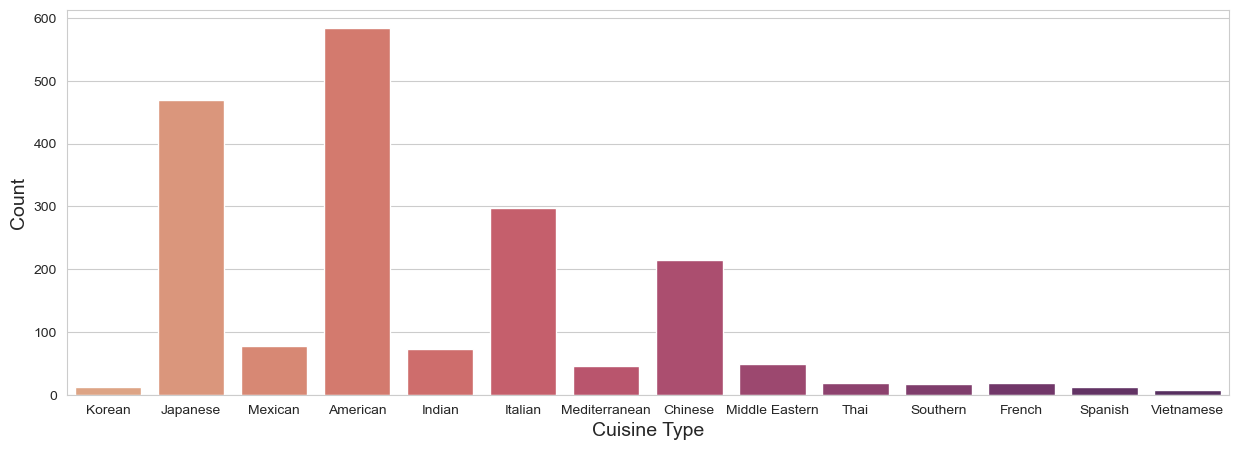

In [178]:
plt.figure(figsize = (15,5))
chart = sns.countplot(data = df, x = 'cuisine_type', palette="flare"); ## Create a countplot for cuisine type.
set_xaxis(chart, "Cuisine Type")
set_yaxis(chart, "Count")

#### Cost of the order

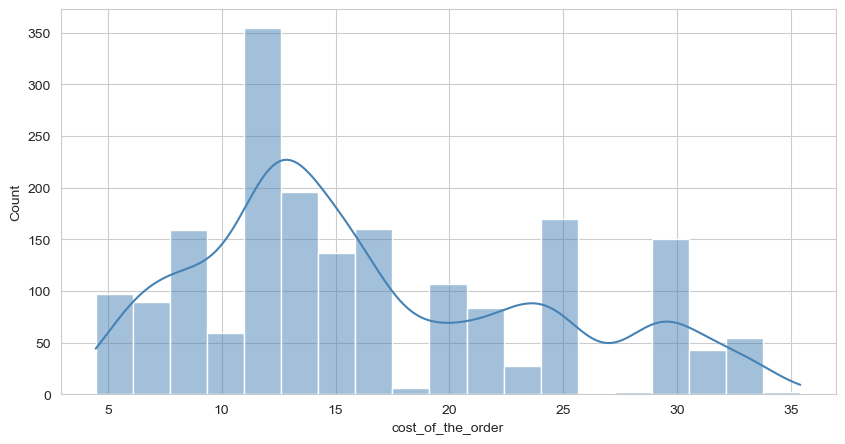

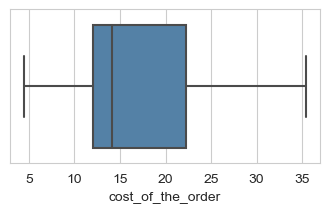

In [173]:
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='cost_of_the_order', color='steelblue', kde=True) ## Histogram for the cost of order
plt.show()
plt.figure(figsize = (4,2))
sns.boxplot(data=df,x='cost_of_the_order', color='steelblue') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [19]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

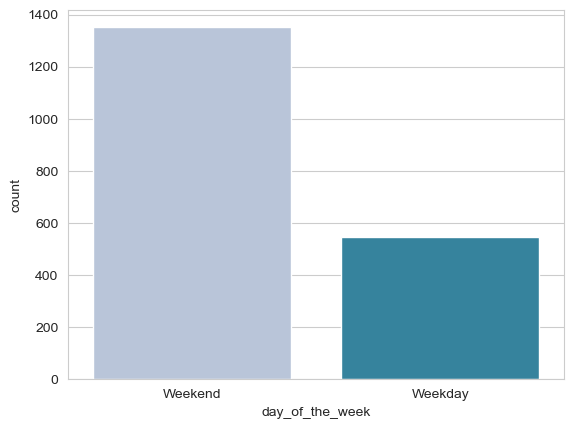

In [184]:
sns.countplot(data = df, x = 'day_of_the_week', palette='PuBuGn'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [23]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

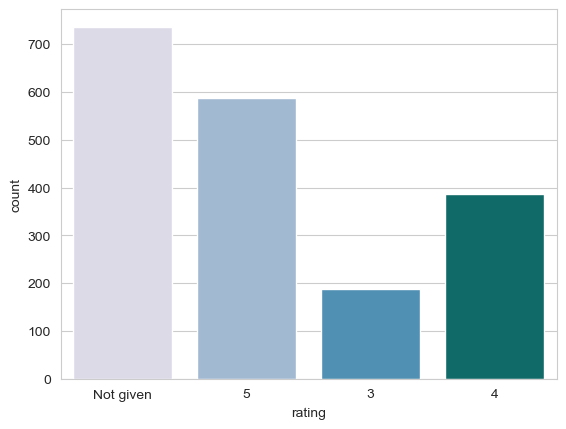

In [136]:
sns.countplot(data = df, x = 'rating', palette='PuBuGn'); ## Complete the code to plot bar graph for 'rating' column

In [188]:
df.rating.value_counts(normalize=True)

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64

#### Food Preparation time

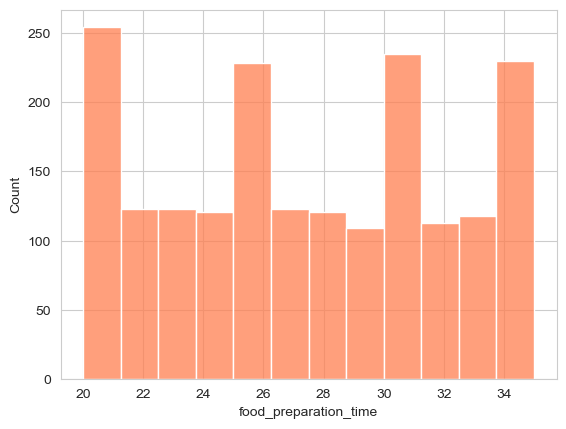

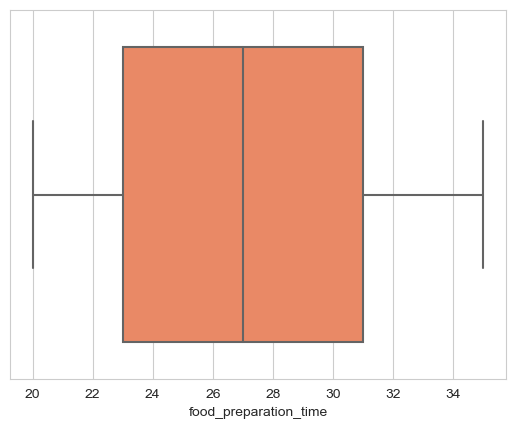

In [165]:
sns.histplot(data=df,x='food_preparation_time', color='coral') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time', color='coral') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

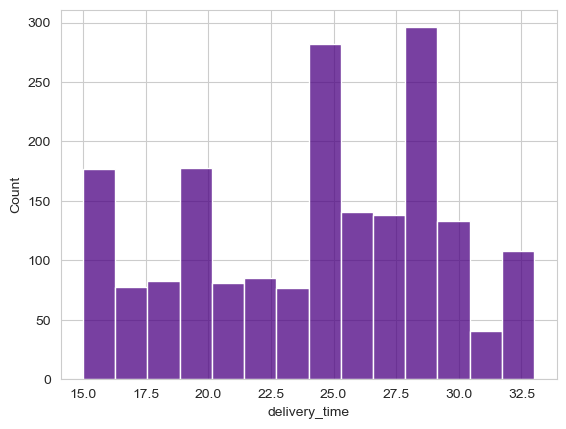

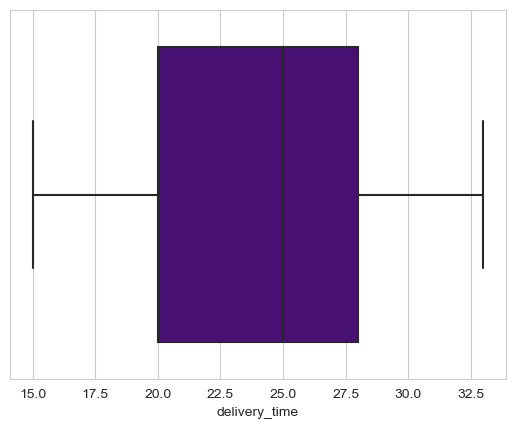

In [163]:
sns.histplot(data=df,x='delivery_time', color='indigo') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time', color='indigo') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [43]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [53]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].describe() ## Complete the code to check unique values for the cuisine type on weekend

count         1351
unique          14
top       American
freq           415
Name: cuisine_type, dtype: object

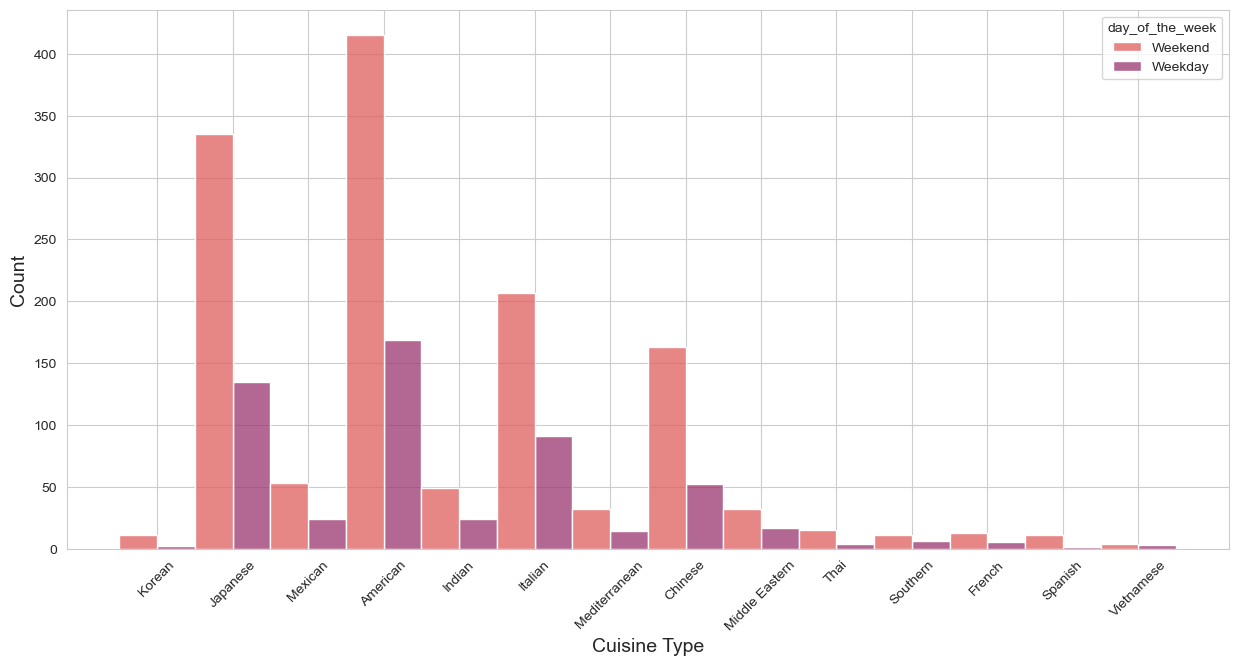

In [179]:
plt.figure(figsize=(15, 7))
chart = sns.histplot(data=df, x='cuisine_type', hue='day_of_the_week', stat='count', multiple='dodge', palette='flare')
plt.xticks(rotation=45)
set_xaxis(chart, "Cuisine Type")
set_yaxis(chart, "Count")
plt.show()

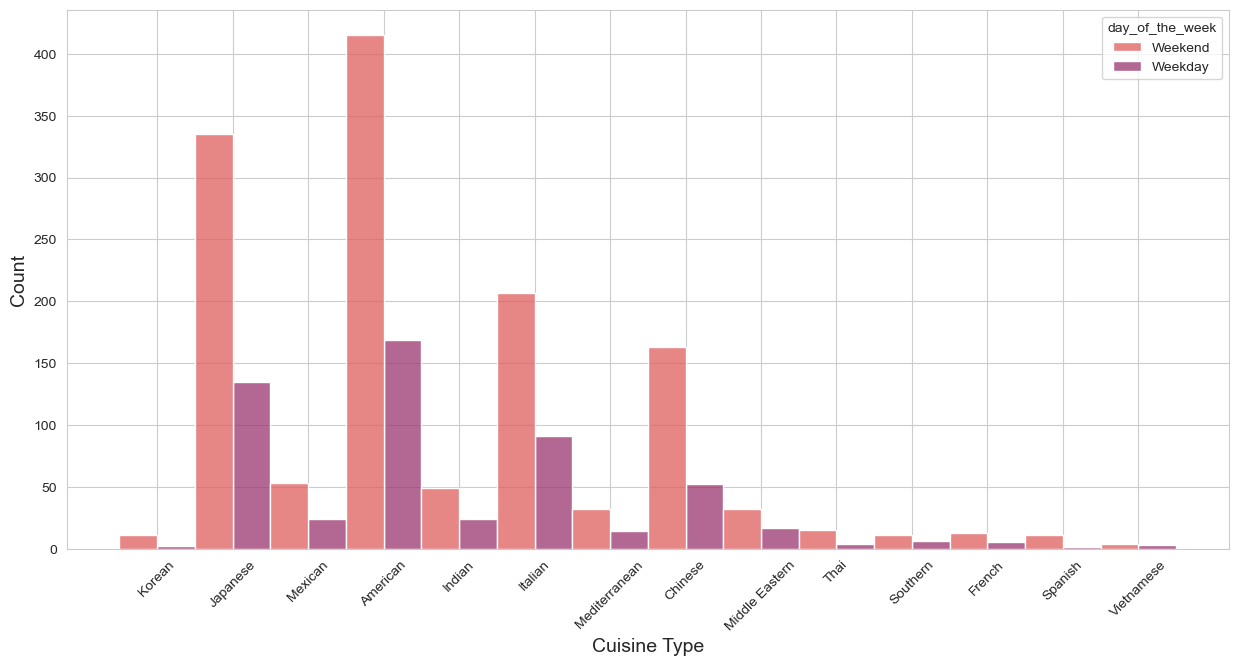

In [179]:
# reshape this to be just the top 4 restaurants
plt.figure(figsize=(15, 7))
top_4 = 
chart = sns.histplot(data=df, x='cuisine_type', hue='day_of_the_week', stat='count', multiple='dodge', palette='flare')
plt.xticks(rotation=45)
set_xaxis(chart, "Cuisine Type")
set_yaxis(chart, "Count")
plt.show()

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [55]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [59]:
# Tammy's version
total_orders = df.shape[0]  # Calculating the total number of orders

more_than_20 = df[df['cost_of_the_order'] > 20]  # creating a new df with only orders greater than 20 USD

more_than_20_percent = round(more_than_20.shape[0] / total_orders * 100,2) # calculate the percentage

print('The number of orders costing more than $20 is:', more_than_20.shape[0])
print('The percentage of orders costing more than $20 is:', more_than_20_percent, '%')

The number of orders costing more than $20 is: 555
The percentage of orders costing more than $20 is: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [63]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean() ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [213]:
# Get the counts of  each customer_id
top_3_cust = df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 3 cmost frequent customers
top_3_cust

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

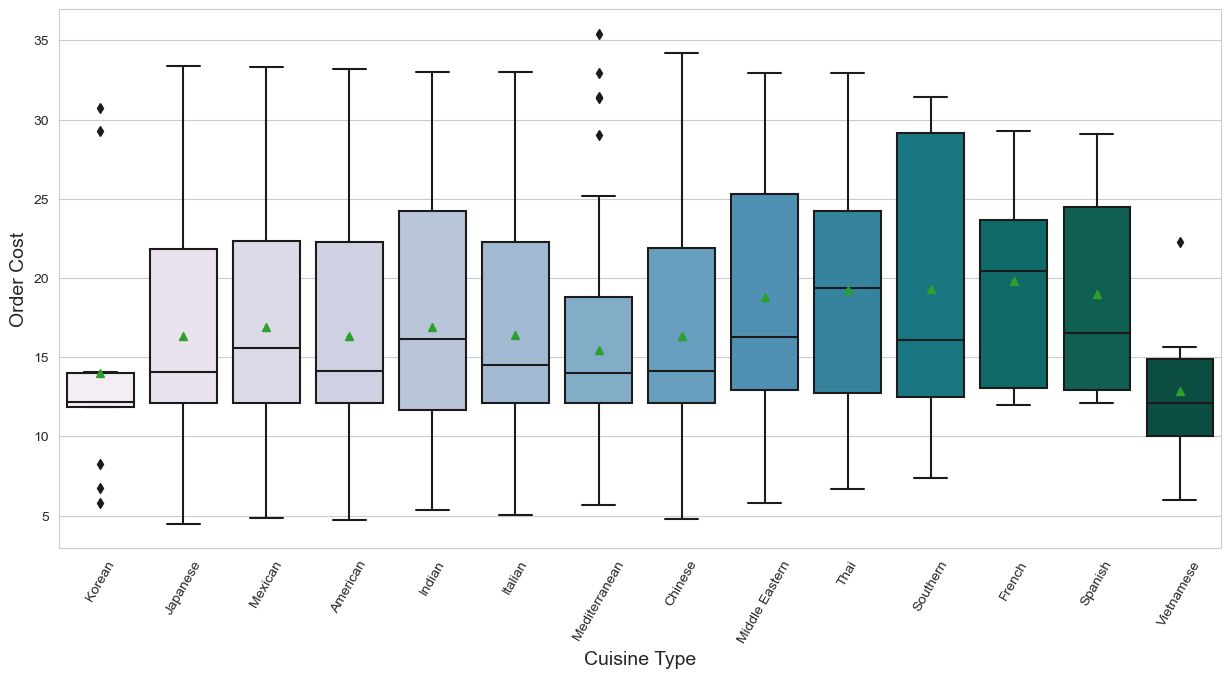

In [240]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
chart = sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBuGn', showmeans=True)
plt.xticks(rotation = 60)
set_xaxis(chart, "Cuisine Type")
set_yaxis(chart, "Order Cost")
plt.show()

#### Cuisine vs Food Preparation time

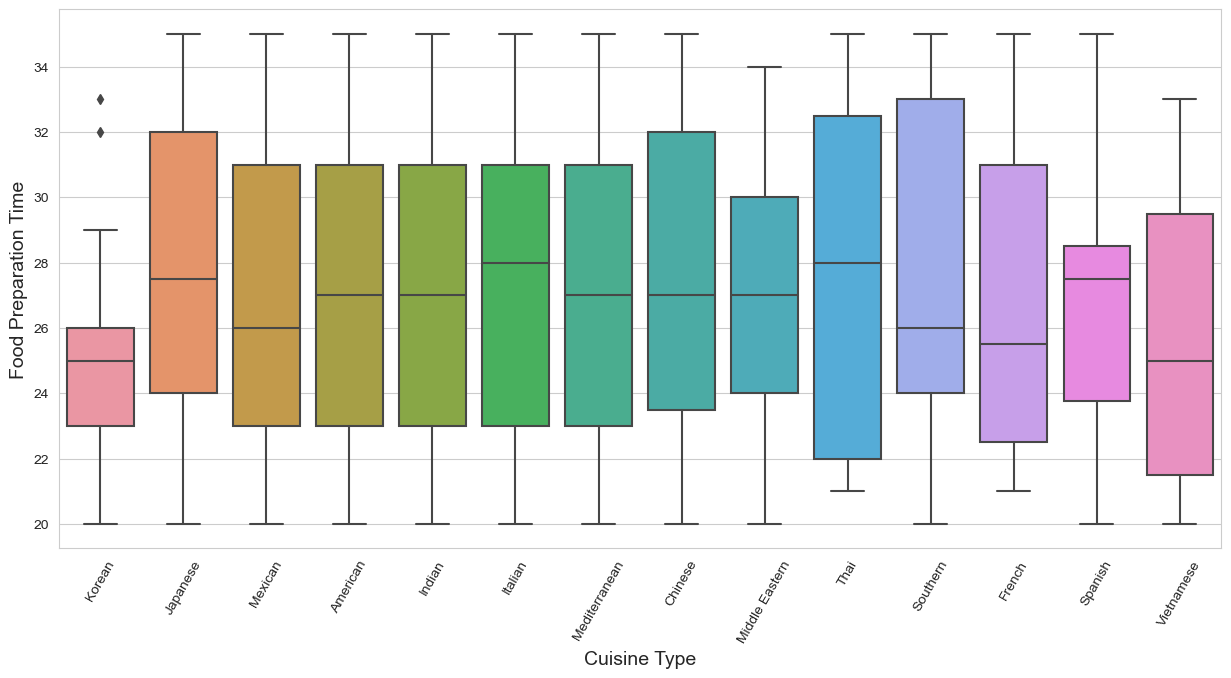

In [180]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
chart = sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
set_xaxis(chart, "Cuisine Type")
set_yaxis(chart, "Food Preparation Time")
plt.show()

#### Day of the Week vs Delivery time

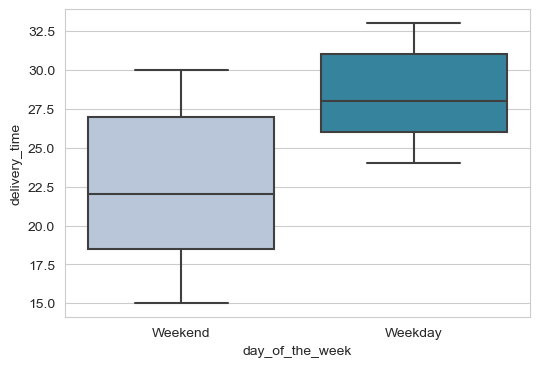

In [181]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='PuBuGn')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [80]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

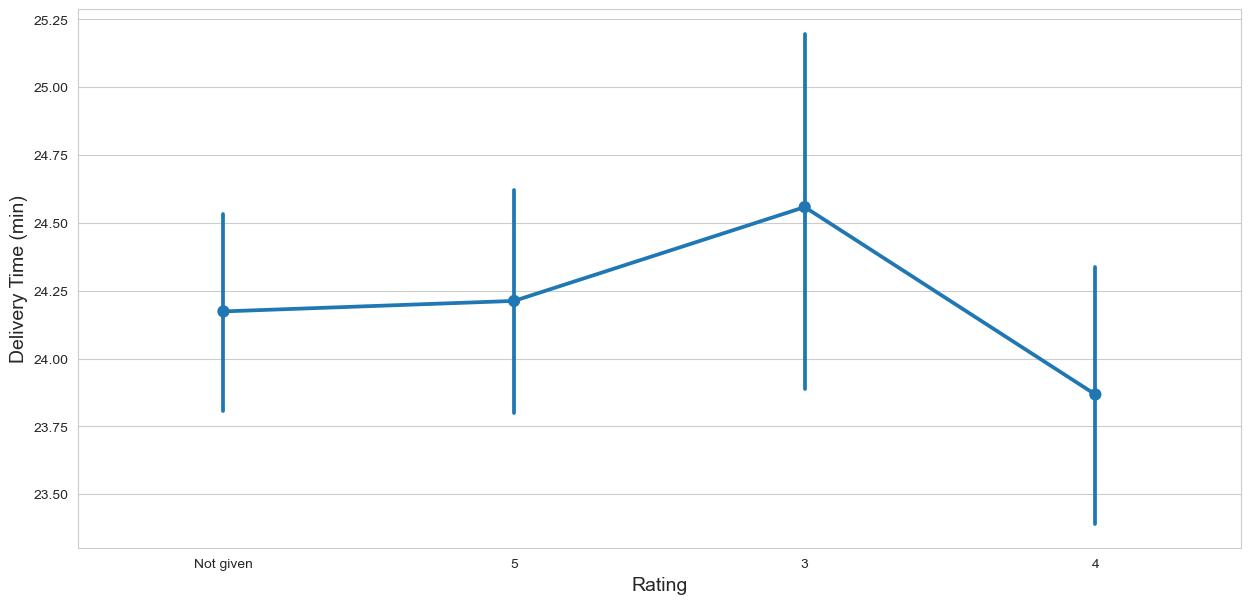

In [153]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
chart = sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
set_xaxis(chart,"Rating")
set_yaxis(chart,"Delivery Time (min)")
plt.show()

#### Rating vs Food preparation time

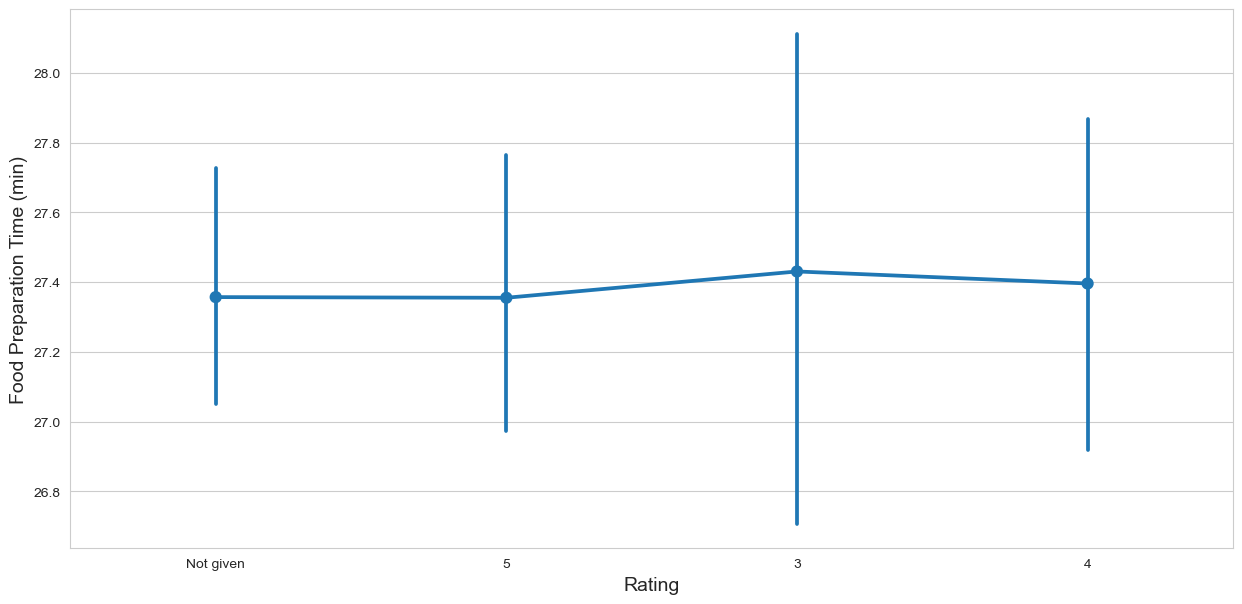

In [154]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
# sns.pointplot('_______')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
chart = sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
set_xaxis(chart,"Rating")
set_yaxis(chart,"Food Preparation Time (min)")
plt.show()

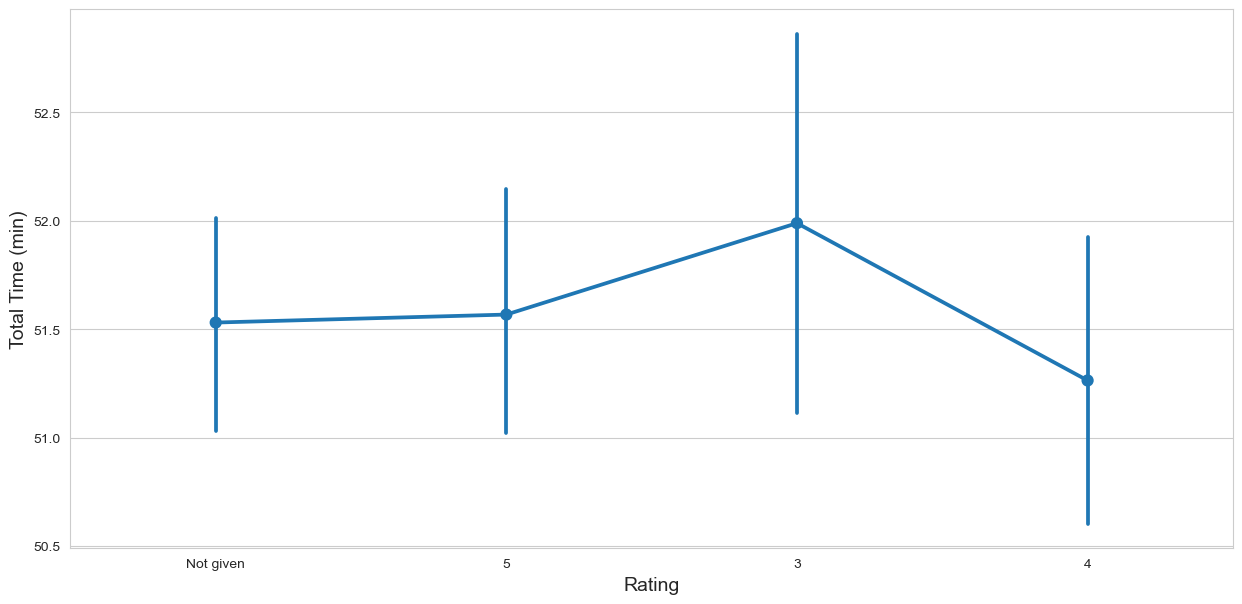

In [212]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
# sns.pointplot('_______')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
chart = sns.pointplot(x = 'rating', y = 'total_time', data = df)
set_xaxis(chart,"Rating")
set_yaxis(chart,"Total Time (min)")
plt.show()

#### Rating vs Cost of the order

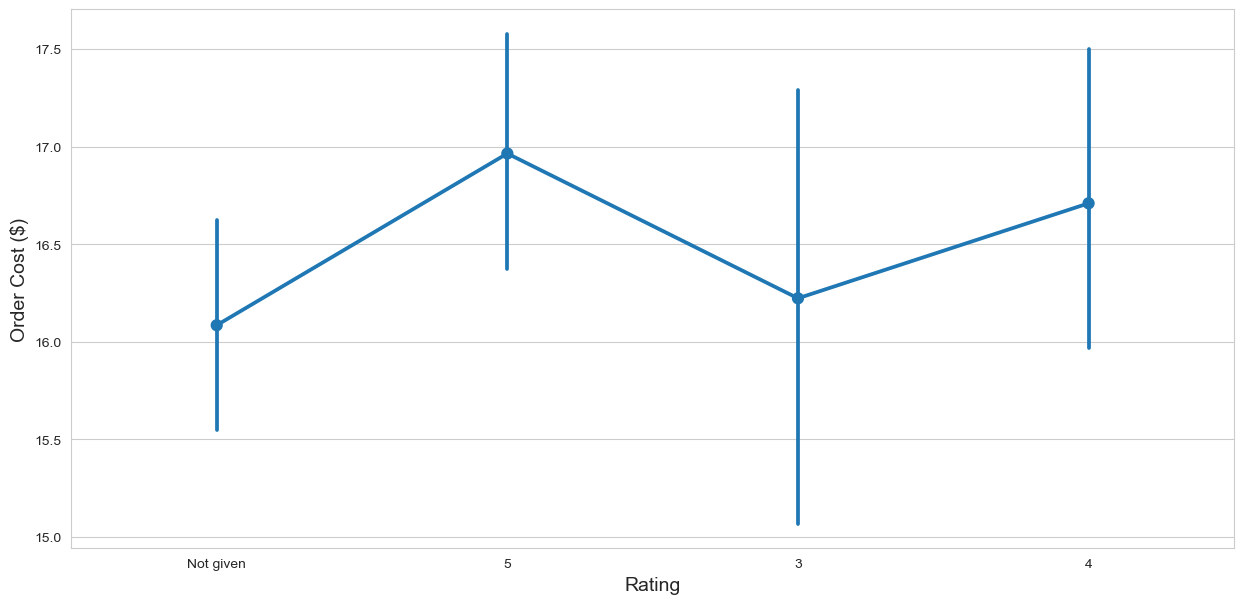

In [156]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
# sns.pointplot('_______')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
chart = sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
set_xaxis(chart,"Rating")
set_yaxis(chart,"Order Cost ($)")
plt.show()

#### Correlation among variables

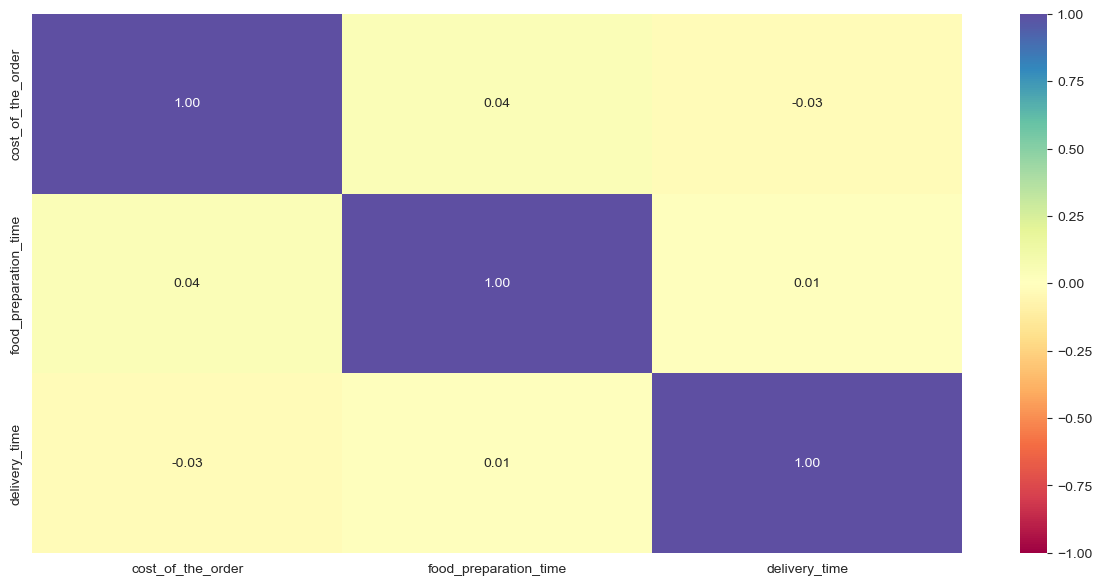

In [142]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [86]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [91]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(df.restaurant_name).agg({'rating':["count","mean"]})

rating      
                           count  mean
restaurant_name                       
Blue Ribbon Fried Chicken     64 4.328
Blue Ribbon Sushi             73 4.219
Shake Shack                  133 4.278
The Meatball Shop             84 4.512

In [ ]:
# Get the restaurant names that have rating count more than 50
# rest_names = df_rating_count['___']['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
# df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
# df_mean_4.groupby([df_])['_______'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [192]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738,49


In [193]:
# Tammy's version
rev=0
profit=0
i=0
for i in range(len(df)):
    if df.loc[i,'cost_of_the_order'] > 20:
        profit=df.loc[i,'cost_of_the_order']*0.25 # revenue for gt20 orders is 25 percent
        rev+=profit
    elif df.loc[i,'cost_of_the_order'] > 5:
        profit=df.loc[i,'cost_of_the_order']*0.15 # revenue for gt 5 lt= 20 is 15 percent
        rev+=profit
print('The net revenue is: $','%.2f'%rev)  # display only 2 decimal points

The net revenue is: $ 6166.30


In [194]:
# get the total revenue and print it
total_rev = df['Revenue'].sum().sum() ## Write the appropriate function to get the total revenue

print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [198]:
# temp = df[df.restaurant_name.isin(over50ratings)]
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738,49


In [200]:
df['Revenue'].head()

0   7.688
1   1.812
2   1.835
3   7.300
4   1.738
Name: Revenue, dtype: float64

In [234]:
# calculate the total revenue from the top 3 customers
cust_list = [52832, 47440, 83287]
top_cust_df = df[df['customer_id'].isin(cust_list)]
top_cust_df.groupby(df.customer_id).agg({'Revenue':["sum"]})

,Revenue
,sum
customer_id,
47440,31.599
52832,44.899
83287,26.236


In [235]:
df.Revenue.mean()

3.248842465753422

In [236]:
df.Revenue.median()

2.121

In [237]:
df.Revenue.mode()

0   1.827
Name: Revenue, dtype: float64

In [203]:
df_mean_4['Revenue'] = df_mean_4['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df_mean_4.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.300,Weekend,5,23,17,6.075
15,1477414,66222,Shake Shack,American,16.200,Weekend,5,33,25,2.430
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.200,Weekend,4,35,26,2.430
22,1478287,150599,Shake Shack,American,29.100,Weekday,5,21,30,7.275


In [229]:
cust_list = [52832, 47440, 83287]
#df_mean_4['customer_id'] == 52832
top_3_customer_rev = df_mean_4[df_mean_4['customer_id'].isin(cust_list)].Revenue.sum().sum()
top_3_customer_rev

11.057

In [214]:
# whats the revenue for the top 4 restaurants?
df_mean_4.groupby(df.restaurant_name).agg({'Revenue':["sum","mean"]})

Revenue      
                              sum  mean
restaurant_name                        
Blue Ribbon Fried Chicken 236.565 3.696
Blue Ribbon Sushi         225.837 3.094
Shake Shack               438.620 3.298
The Meatball Shop         304.967 3.631

In [209]:
a = df_mean_4.groupby(df.restaurant_name)['Revenue'].sum().sum()
print(a)
print(rev)
print(a/rev*100)

1205.9904999999999
6166.302999999994
19.557756081723536


In [226]:
# find the revenue for the top 3 customers

# get a list of only the orders from the top 3 customer IDs
top_3_cust_ids = df['customer_id'].value_counts()
print(top_3_cust_ids)

top_3_rev = df[df['customer_id'].isin(top_3_cust_ids)].copy()
top_3_rev.head(3)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time


In [215]:
# find the revenue for the top 3 customers
top_3_cust['Revenue'] = top_3_cust['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
top_3_cust.head()

# get a list of only the orders from the top 3 customer IDs
top_3_cust_ids = df['customer_id'].value_counts().head(3)

# Get the restaurant names that have rating count more than 50
top_cust_ids = df[df['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

KeyError: 'cost_of_the_order'

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [114]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Get orders that cost above 20 dollars
df_greater_than_60 = df[df['total_time']>60] ## create dataframe with orders with total time above 60 minutes

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that takes more than 60 minutes is:', df_greater_than_60.shape[0], "out of", df.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 60 minutes:", round(percentage, 2), '%')


The number of total orders that takes more than 60 minutes is: 200 out of 1898
Percentage of orders above 60 minutes: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [122]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes.')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes.')


The mean delivery time on weekdays is around 28 minutes.
The mean delivery time on weekends is around 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* There are 5 numerical data columns: 1 of type float and 4 integer types; and 4 objects type columns.
* Rating is type object, which means it has non-integer values. More to investigate there.

* There are no missing values since each column contains 1898 non-null values, which matches the size of our data frame from above (1898)
* Rating is type object, which means it has non-integer values. More to investigate there.

* `Order IDs:` The summary doesn't make sense for the order IDs, we can ignore this.
* `Customer IDs`: The summary doesn't make sense for the customer IDs, we can also ignore this.
* `Cost of Order`: The average code of orders is 16.50 USD with the most expensive order being 35.41 USD; The majority of orders (75% or less) cost less than 23.00 USD. 
* `Food Preparation Time`: The average food preparation time is 27.3 minutes; the fastest food prepared is 20 minutes and longest time to prepare is 35 minutes.
* `Delivery Time`: The average delivery time is 24 minutes, with the fastest time at 15 min and longest taking 33 minutes to deliver. 

* There are 736 orders that have a rating of "Not given", which is approximately 39% of all orders.

- Order Costs
    - The average cost of the order is 14 USD, where the least expensive is around 5 USD and most expensive is 35 USD.
    - The cost of the orders data is right skewed with some variablity.
    - The largest percentage of orders costs 11-13 USD.
<br><br>
- Weekdays v. Weekends
    - More orders occur on the weekend versus the weekday
<br><br>
- Rated Orders
    - Of the orders that were rated, there are 2x more 4 star ratings than 3 star, and roughly 3x more 5 star ratings than 3 star ratings. 
    - Alternatively, there are double the number of 4 star ratings than 3 star. Then 50% more 5 star ratings compared to 4 star ratings.
    
   
* The top 5 restaurants ordered the most are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm
    
* American cuisine is the most popular cuisine ordered on weekends
* The second most popular cuisine on weekends is Japanese

* The percentage of orders costing more than $20 is: 29 percent

* Four restaurants fall into the promotion category where they achieved more than 50 ratings and the rating is > 4
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop

* The revenue for all orders is 6,155.30 USD

* The percentage of orders taking more than 60 minutes is: 11 %. 
* The restaurant deliveries that are more likely to take longer come from Shake Shack, Blue Ribbon Sushi, and The MeatBall Shop

* Weekend orders vary by nearly 6 minutes (5.87 to be exact). 
* The delivery time of orders on the weekend is 22.47 minutes
* The delivery time of orders on the weekday is 28.34 minutes

### Recommendations:

*  

---